In [3]:
import numpy as np
from numpy import e
from matplotlib import pyplot as plt
import scipy
from scipy.integrate import odeint
import pandas as pd

from tabulate import tabulate

import phaseportrait
  
# importing the style package
from matplotlib import style  
# using the style for the plot
plt.style.use('seaborn-v0_8-darkgrid')
floatfmt = '.2f'

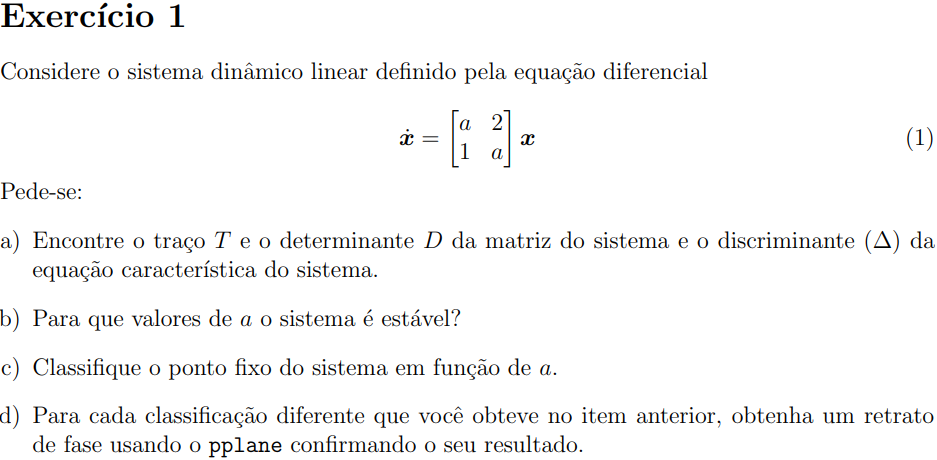

**a)**

$T = 2a$

O determinante $D$ é:

$D = a^2 - 2$

Para encontrar o discriminante $\Delta$, temos:

$det(A-\lambda I)=0 \implies (a-\lambda)^2-2=0 \implies \lambda^2 - 2a \lambda + (a^2 -2) = 0 \implies \lambda^2 - T \lambda + D = 0$

e o discriminante é

$\Delta = T^2 -4D = 4a^2 - 4a^2 + 8 = 8$

e os autovalores são:

$\lambda = \frac{2a \pm \sqrt{8}}{2} = a \pm \sqrt{2}$

<!-- **b) e c)**

Dado que $\Delta = 8$ em todos os casos, o sistema pode adotar três características:

- **Nó estável**:
  
  Para obter um nó estável, temos $p < 0$ e $q>0$, então
  
  $2a < 0 \implies a < 0$

  e

  $a^2 - 2 > 0 \implies |a| > \sqrt{2}$

  então teremos um nó estável quando $a < -\sqrt{2}$. Nesse caso, os dois autovalores $\lambda_{1,2} < 0$

- **Nó instável**:

  Se tivermos $p > 0$ e $q>0$, então $2a>0 \implies a>0$  e $|a| > \sqrt{2} \implies a > \sqrt{2}$

  Nesse caso, os dois autovalores $\lambda_{1,2} > 0$

- **Ponto de sela**:

  Se $q<0$, então $|a| < \sqrt{2}$  e os dois autovalores $\lambda_{1,2}$ terão sinais trocados e teremos um ponto de sela, instável
 -->

**d)**

**Nó estável**

**$$a=-2$$**

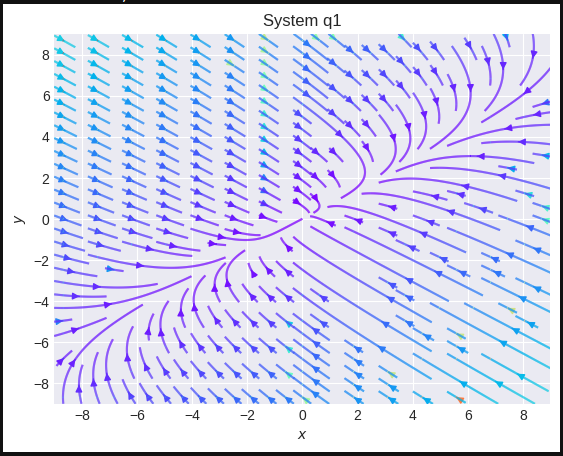

**Nó instável**

$$a=2$$

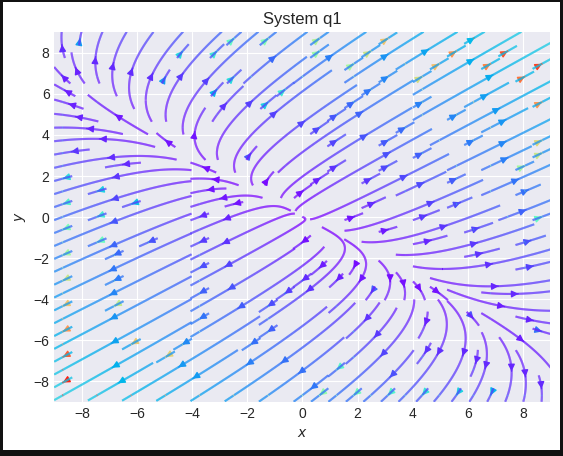

**Ponto de sela**

$$a=-0.2$$

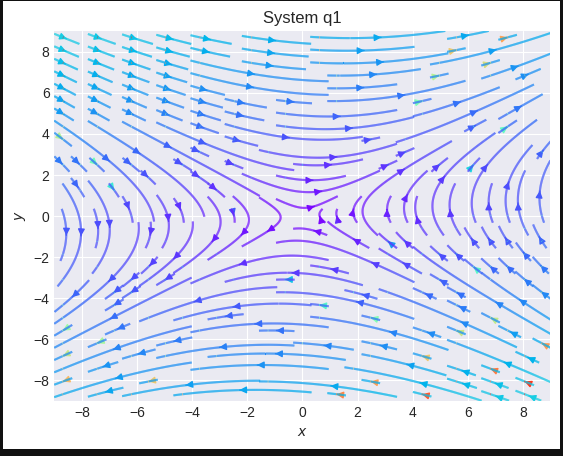

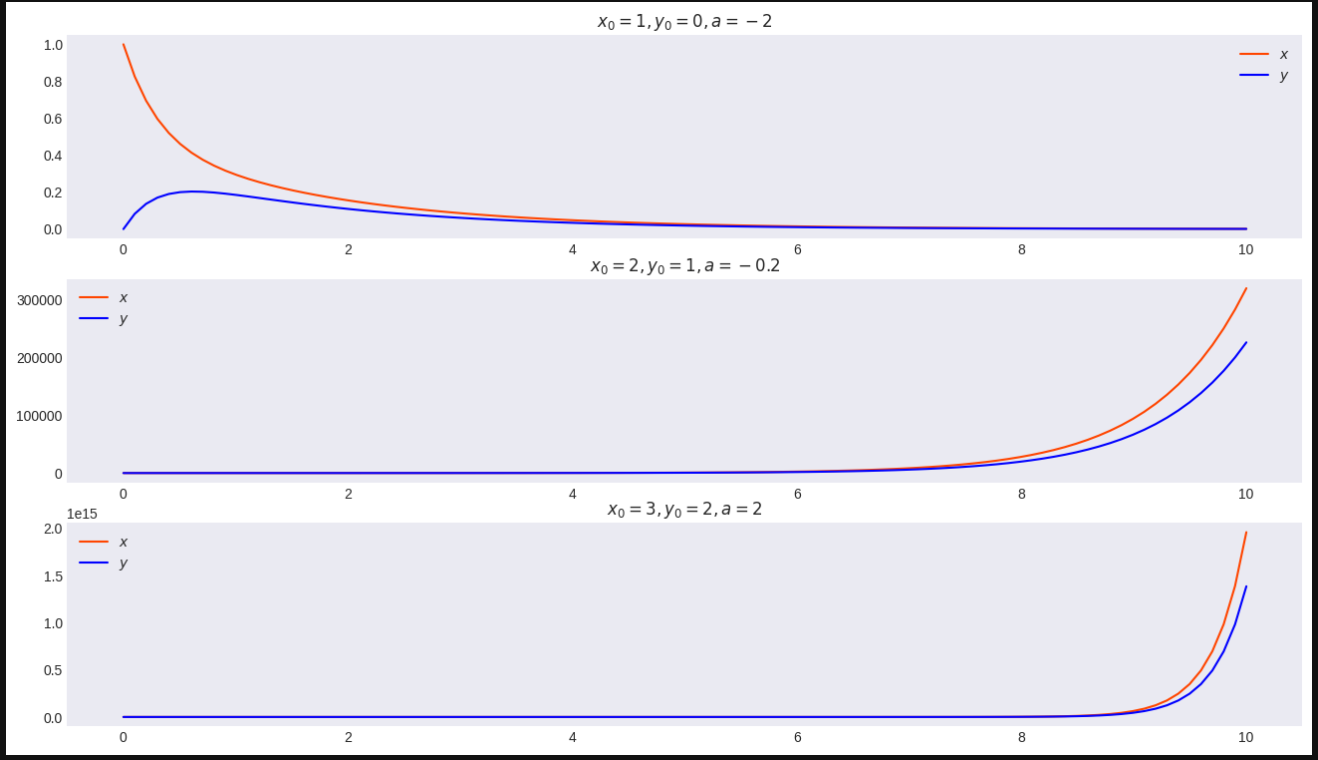

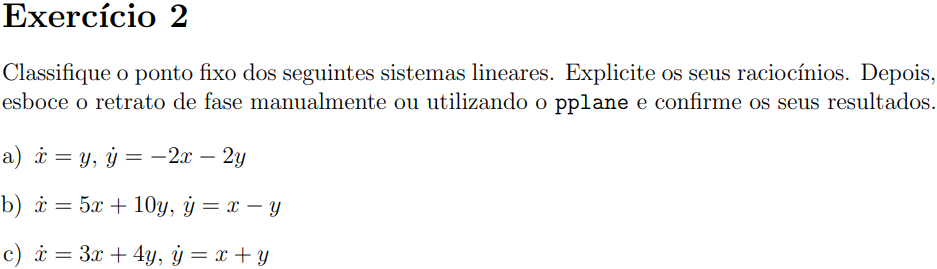

**a)** 

$$T = -2$$
$$D=2$$
$$\Delta=-4$$

Como $\Delta<0$, $T<0$ e $D>0$, o sistema é uma espiral assintóticamente estável

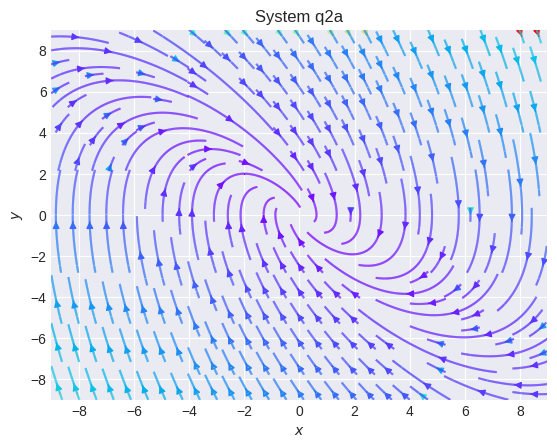

**b)** 

$$T = 4$$
$$D = -15$$
$$\Delta=76$$

Como $\Delta>0$, e $D<0$, o sistema é um ponto de sela

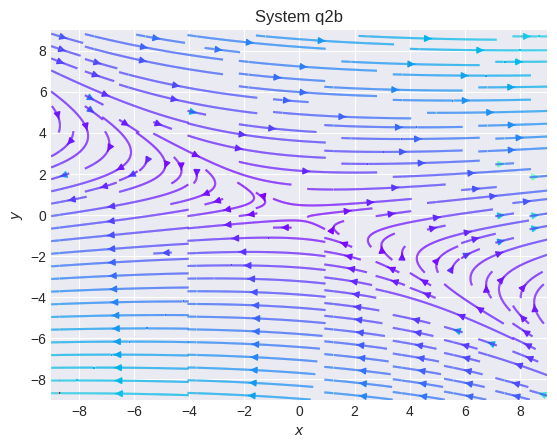

**c)** 

$$T = 4$$
$$D = -1$$
$$\Delta=20$$

Como $\Delta>0$, e $D<0$, o sistema é um ponto de sela

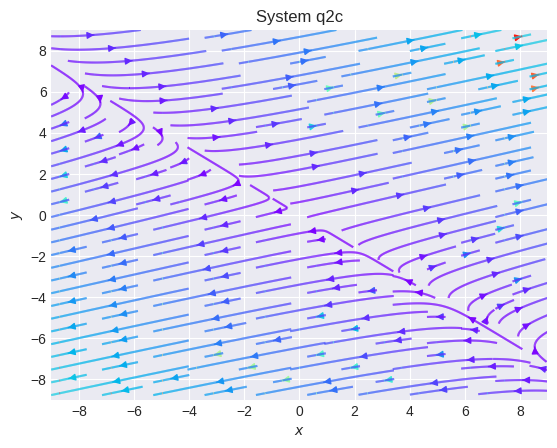

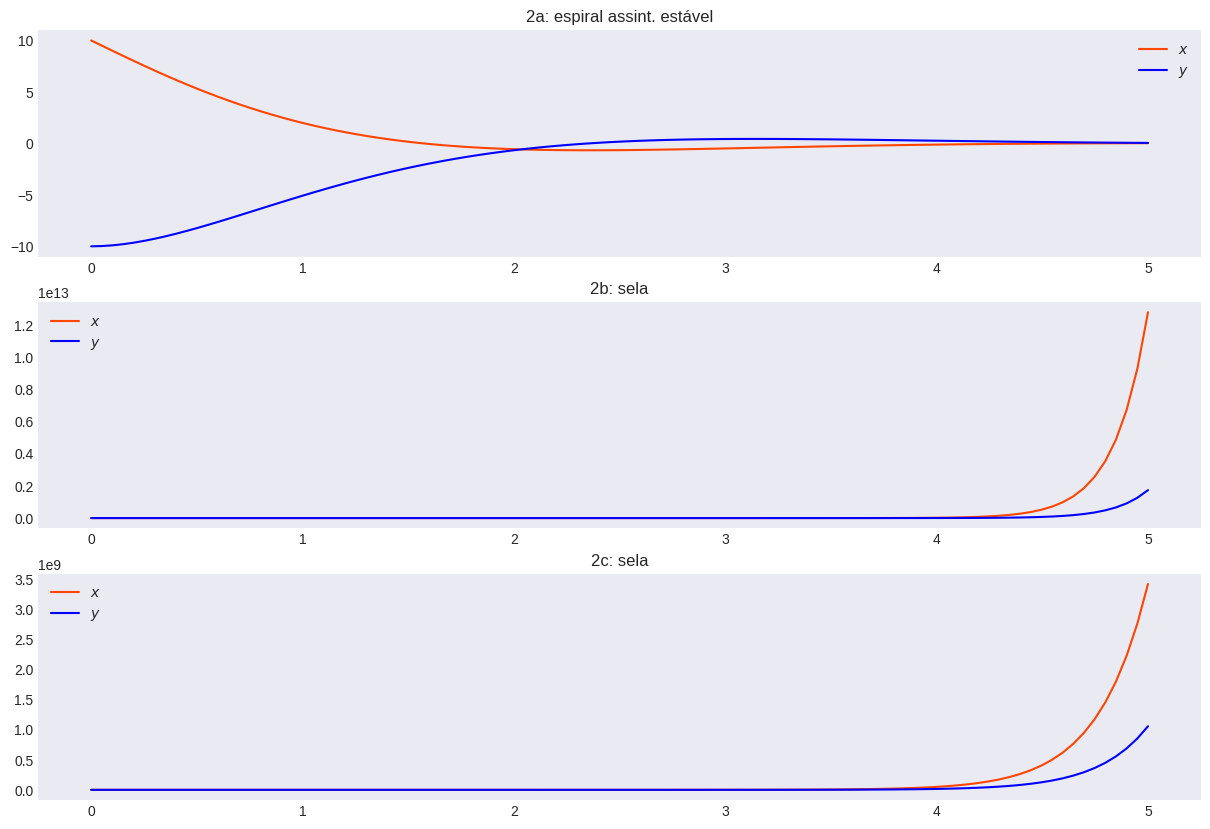

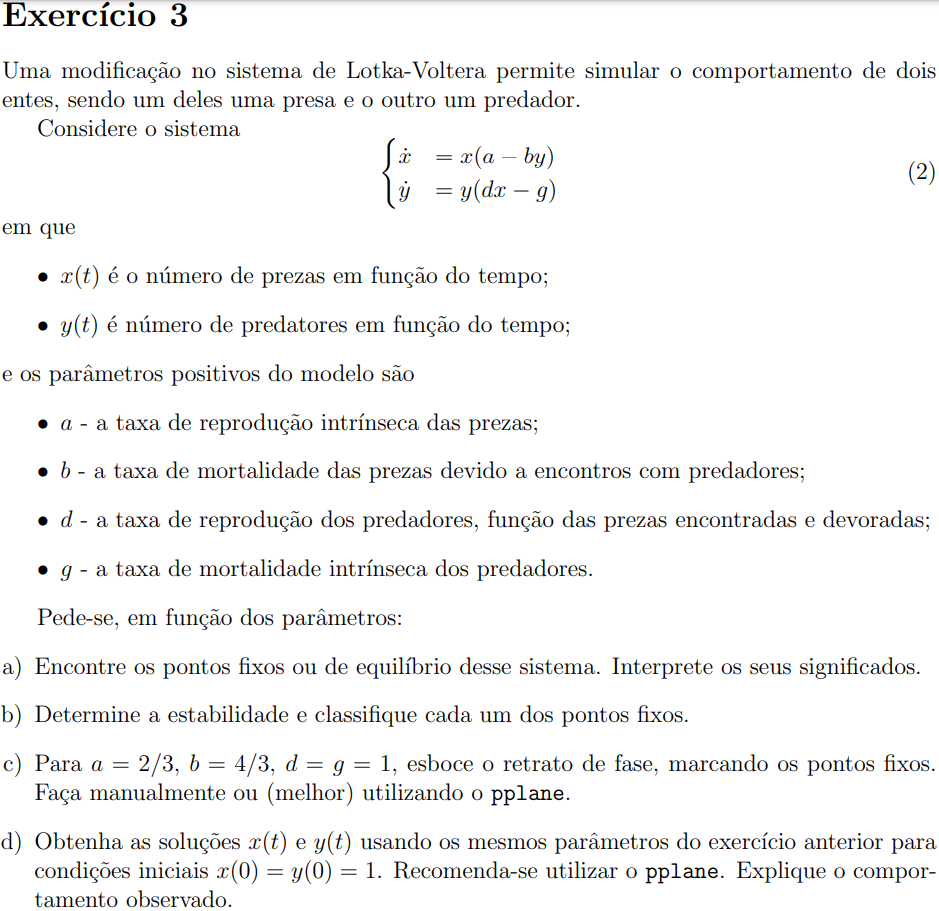

**a)** 

Para encontrar os pontos fixos, temos:
$$
\begin{align}
0 & = x(a - by) \\
0 & = y(dx - g) \\
\end{align}
$$

portanto, os pontos fixos são 

$$x_1^*,y_1^* = \{0,0\}$$ 

O primeiro ponto indica que não haverá mudanças nas populações $x$ e $y$ se ambas forem 0. 


$$x_2^*,y_2^* = \{\frac{b}{a},\frac{g}{d}\}$$

O segundo ponto indica que a população final dos predadores é indicado pela taxa de mortalidade/taxa de reprodução das presas -- (e o mesmo para as presas com relação às taxas dos predadores)

**b)** 

A Jacobiana $J$ do sistema é:

$$
\begin{equation*}
\mathbf{J} =  \begin{bmatrix}
a-by & -bx & \\
dy & dx-g
\end{bmatrix}
\end{equation*}
$$

**No ponto {0,0}**, temos

$$
\begin{equation*}
\mathbf{J_{\{0,0\}}} =  \begin{bmatrix}
a & 0 &\\
0 & -g
\end{bmatrix}
\end{equation*}
$$

onde 
$$T=a-g$$ 
$$D=-ag$$
$$\Delta=a^2 + 2ag + g^2$$

Se todas as taxas $a,b,d,g > 0$, então $\Delta > 0$ e teremos um ponto de sela, instável. Na vizinhaça deste ponto, temos a população de presas crescendo a uma taxa de $ax(t)$ e a população de predadores diminuindo a uma taxa $-gy(t)$. Ao se afastar deste ponto ao longo do tempo, a população de presas será grande o suficiente para sustentar um novo aumento da população de predadores


**No ponto {$x^*,y^*$}**, temos

$${x^*,y^*} = \frac{g}{d},\frac{a}{b}$$

$$
\begin{equation*}
\mathbf{J_{\{x^*,y^*\}}} =  \begin{bmatrix}
0 & -\frac{bg}{d}&\\
\frac{ad}{b} & 0
\end{bmatrix}
\end{equation*}
$$

onde 
$$T=0$$ 
$$D=ag$$
$$\Delta=-4ag$$

Se todas as taxas $a,b,d,g > 0$, então $\Delta < 0$ e como $T=0$, temos um ponto de cetro estável (stable center) teremos um ponto de sela, instável. Na vizinhaça deste ponto, temos as populações de presas e predadores oscilando em um movimento periódico centrado no ponto estável


**c)**

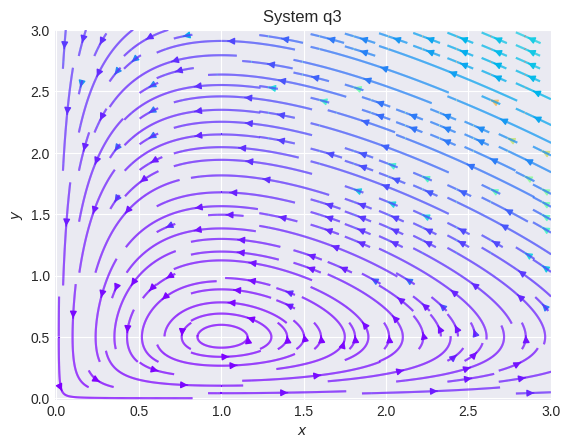

**d)**

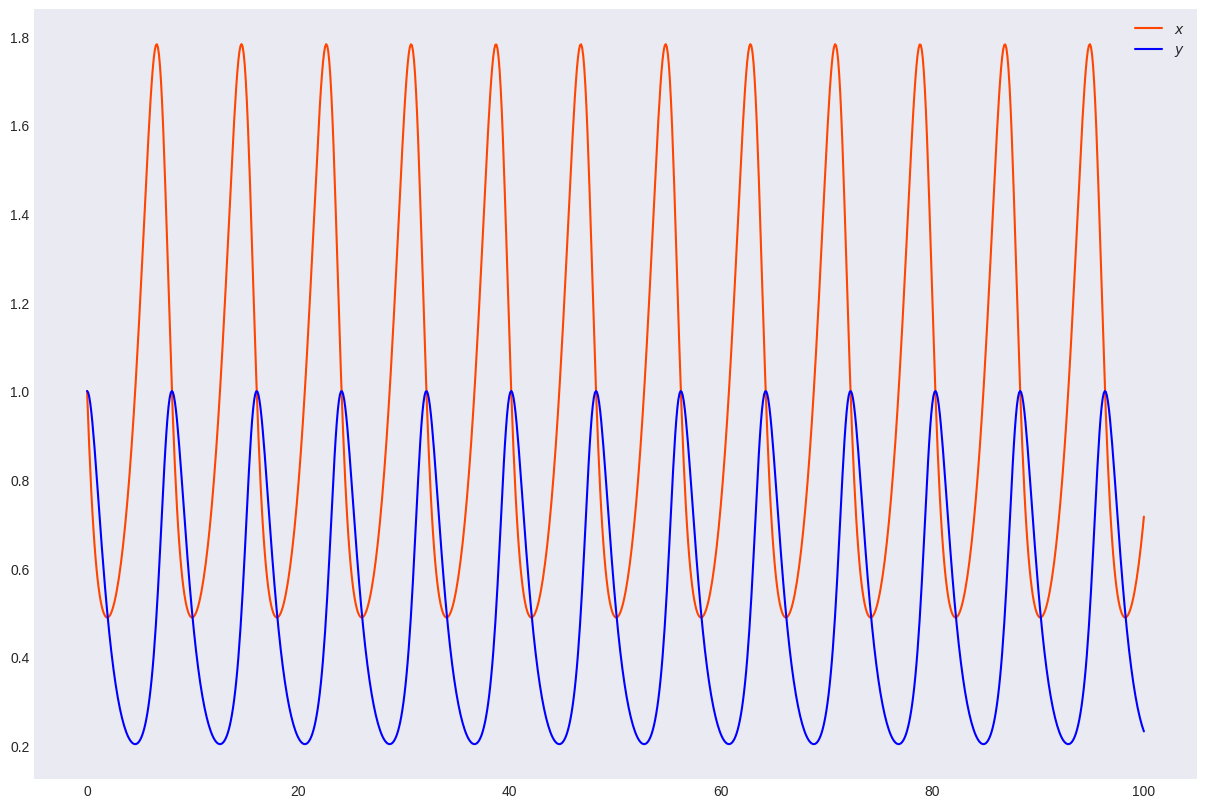

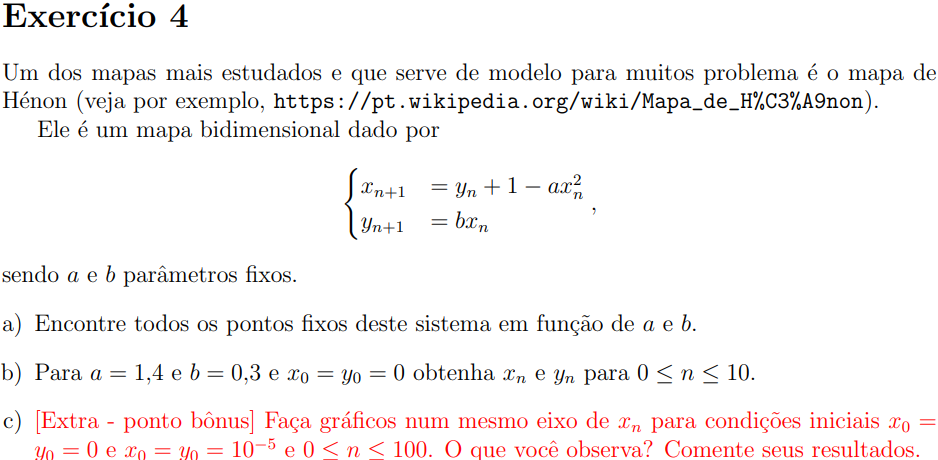

Para encontrar os pontos fixos, temos que $f(p) = p$, então:

$y + 1 - ax^2 = x$

e

$y = bx$

então

$$ax^2 + x - (y+1) = 0$$

$$ax^2 + x - (bx+1) = 0$$
$$ax^2 + (1-b)x - 1 = 0$$

As raízes do polinômio serão:

$$x^* = \frac{-(1-b) +- \sqrt{(1-b)^2 + 4a}}{2a} \implies \frac{(b-1) \pm \sqrt{b^2 - 2b + 1 + 4a}}{2a}$$
$$y^* = bx^*$$

In [56]:
def q4(x_0, y_0, a, b, n = 11):
    out = []

    x_new, y_new = x_0, y_0
    row = (0, x_0, y_0)
    out.append(row)
    
    for i in range(1, n):
        x_n, y_n = x_new, y_new
        
        x_new = y_n + 1 - a*x_n**2
        y_new = b*x_n

        row = (i, x_new, y_new)
        out.append(row)
    return out

a = 1.4
b = 0.3

x_s = ((b-1) + np.sqrt(b**2 - 2*b + 1 + 4*a))/(2*a)
y_s = b*x_s

q4_b = q4(0, 0, a=1.4, b=0.3, n = 11)
print(tabulate(out, headers=['i', 'x_n', 'y_n']))


  i        x_n         y_n
---  ---------  ----------
  0   0          0
  1   1          0
  2  -0.4        0.3
  3   1.076     -0.12
  4  -0.740886   0.3228
  5   0.554322  -0.222266
  6   0.347552   0.166297
  7   0.997188   0.104265
  8  -0.287871   0.299156
  9   1.18314   -0.0863614
 10  -1.0461     0.354942


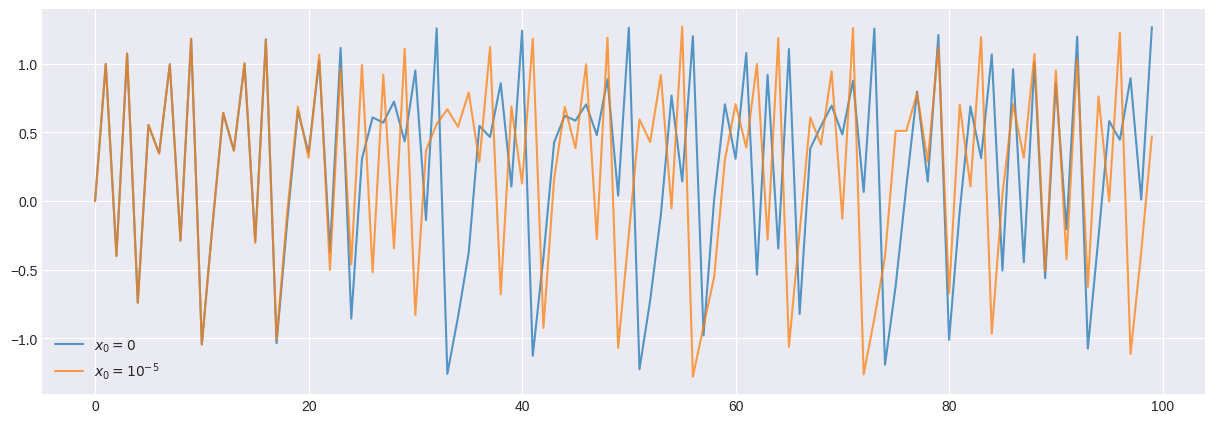

In [60]:
q4_d_0 = q4(0, 0, a=1.4, b=0.3, n = 100)
q4_d_1e5 = q4(1e-5, 1e-5, a=1.4, b=0.3, n = 100)

x_0 = [i[1] for i in q4_d_0]
x_1 = [i[1] for i in q4_d_1e5]

fig, axs = plt.subplots(1,1,figsize=(15,5))
axs = plt.plot(x_0, alpha=0.75, label='$x_0 = 0$')
axs = plt.plot(x_1, alpha=0.75, label='$x_0 = 10^{-5}$')
_ = plt.legend()

Pode-se perceber que, mesmo partindo de pontos iniciais muito próximos, após apenas algumas iterações (~20), o sistema diverge no comportamento e não "sincroniza" mais, excetuando-se alguns poucos pontos, para logo divergir novamente. Este é o comportamento característico de um sistema caótico 

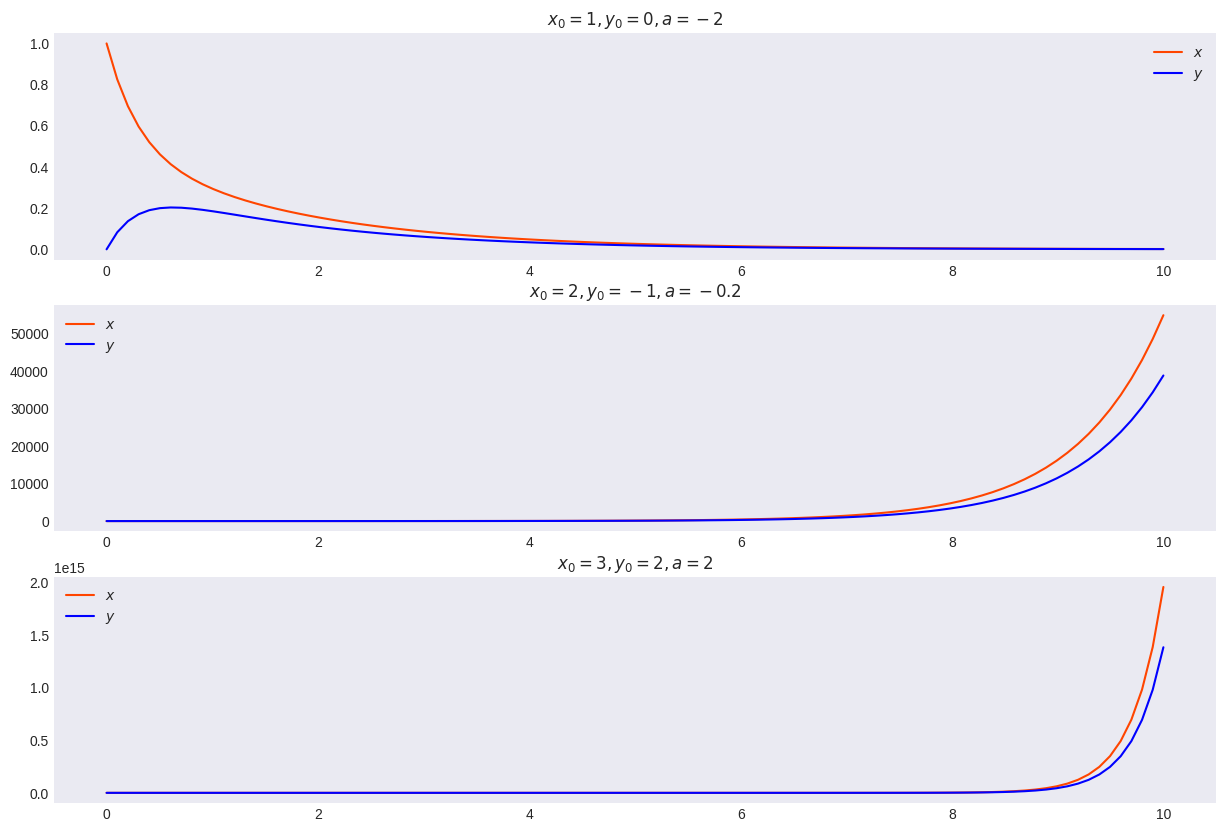

In [3]:
a = -0.2
def q1(x, y):
    dx = a*x + 2*y
    dy = x + a*y
    return dx, dy
    
Q1 = phaseportrait.PhasePortrait2D(q1, [-9, 9], Title='System q1', xlabel=r"$x$", ylabel=r"$y$")
_ = Q1.plot()

def q1_odeint(s, t, a):
    x, y = s
    dx = a*x + 2*y
    dy = x + a*y
    
    return [dx, dy]

fig, axs = plt.subplots(3,1,figsize=(15,10))
t = np.linspace(0, 10, 100)
axs = axs.flatten()
x = (1,2,3)
y = (0,-1,2)
a_s = [-2, -0.2, 2]

for index, init_condit in enumerate(zip(x, y)):
    a = a_s[index]
    sol = odeint(q1_odeint, init_condit, t, args=(a,))
    axs[index].plot(t, sol[:, 0], 'orangered', label='$x$')
    axs[index].plot(t, sol[:, 1], 'blue', label='$y$')
    axs[index].grid()
    axs[index].legend()
    axs[index].set_title(f'$x_0={init_condit[0]}, y_0={init_condit[1]}, a={a}$')

[[ 0  1]
 [-2 -2]]
[[ 5 10]
 [ 1 -1]]
[[3 4]
 [1 1]]


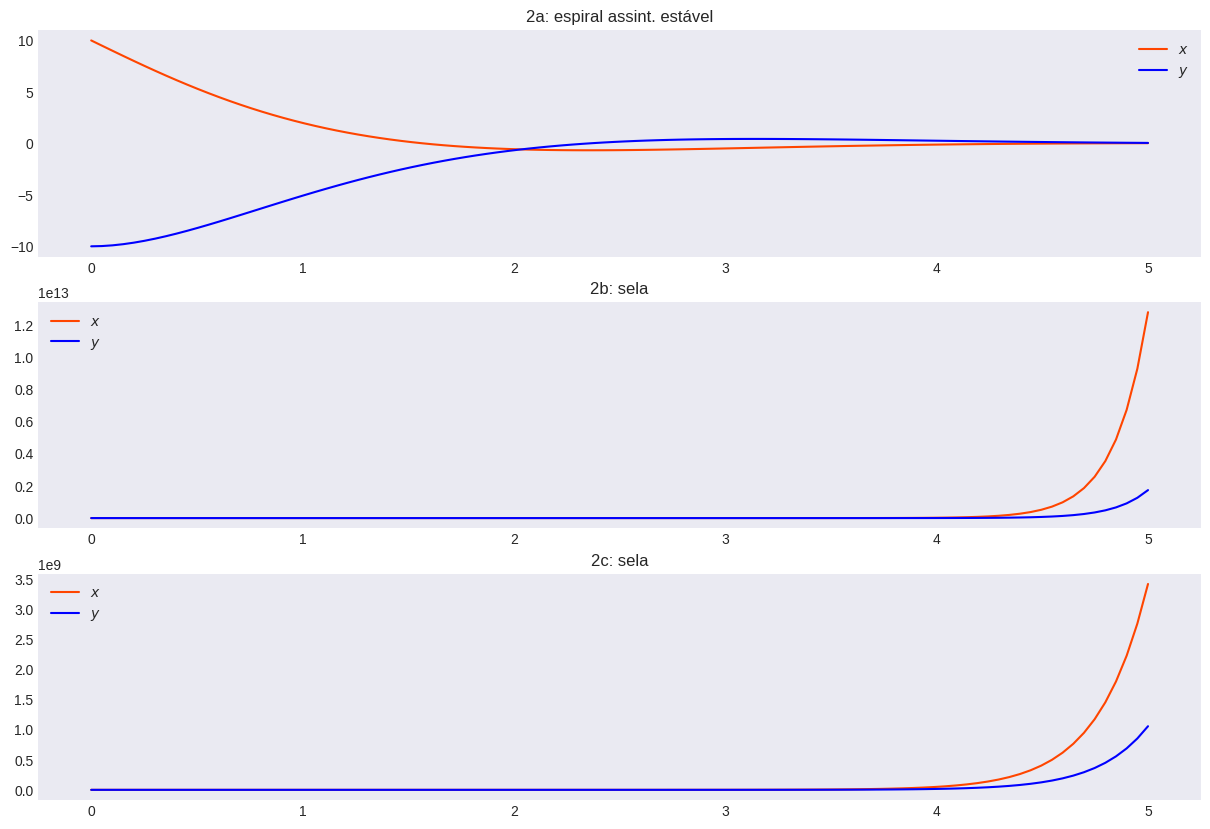

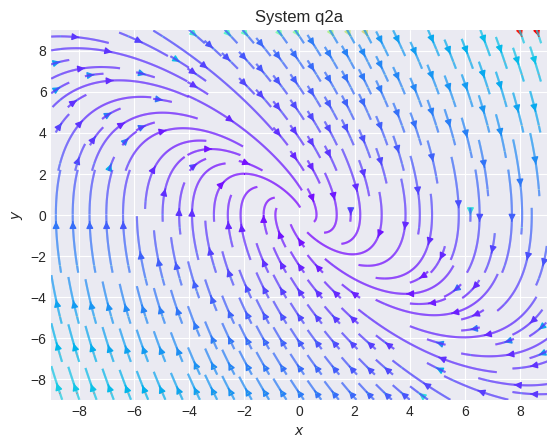

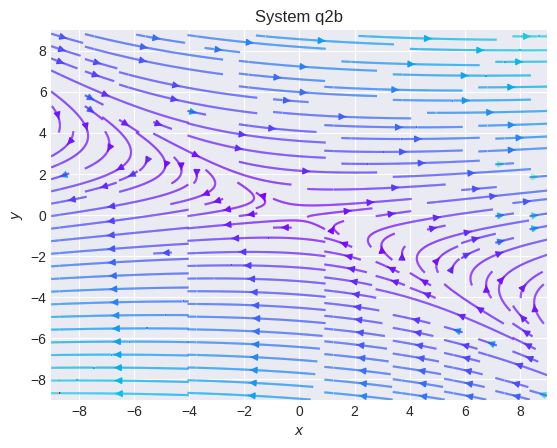

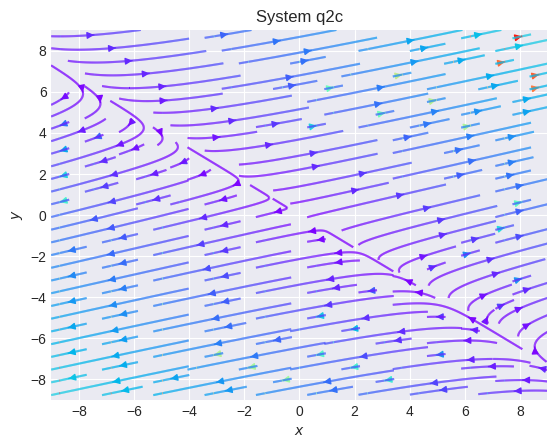

In [10]:
def q2(x, y, *, M):    
    dx, dy = M @ np.array([x,y])
    return dx, dy

def q2_odeint(s, t, M):
    dx, dy = M @ np.array(s)
    return [dx, dy]

fig, axs = plt.subplots(3,1,figsize=(15,10))
t = np.linspace(0, 5, 100)
axs = axs.flatten()
x = (10,0.1,3)
y = (-10,0.1,0)
Ma = np.array([[0, 1],[-2, -2]])
Mb = np.array([[5, 10],[1, -1]])
Mc = np.array([[3, 4],[1, 1]])
M_s = [Ma, Mb, Mc]
desc = ['2a: espiral assint. estável', '2b: sela', '2c: sela']

for index, init_condit in enumerate(zip(x, y)):
    m = M_s[index]

    Q = phaseportrait.PhasePortrait2D(q2, [-9, 9], Title=f'System q2{"abc"[index]}', dF_args={'M':m}, xlabel="$x$", ylabel="$y$")
    _ = Q.plot()

    sol = odeint(q2_odeint, init_condit, t, args=(m,))
    axs[index].plot(t, sol[:, 0], 'orangered', label='$x$')
    axs[index].plot(t, sol[:, 1], 'blue', label='$y$')
    axs[index].grid()
    axs[index].legend()
    axs[index].set_title(f'{desc[index]}')

stable_x, stable_y
stable 1.0 0.5
init_condit [1, 1]


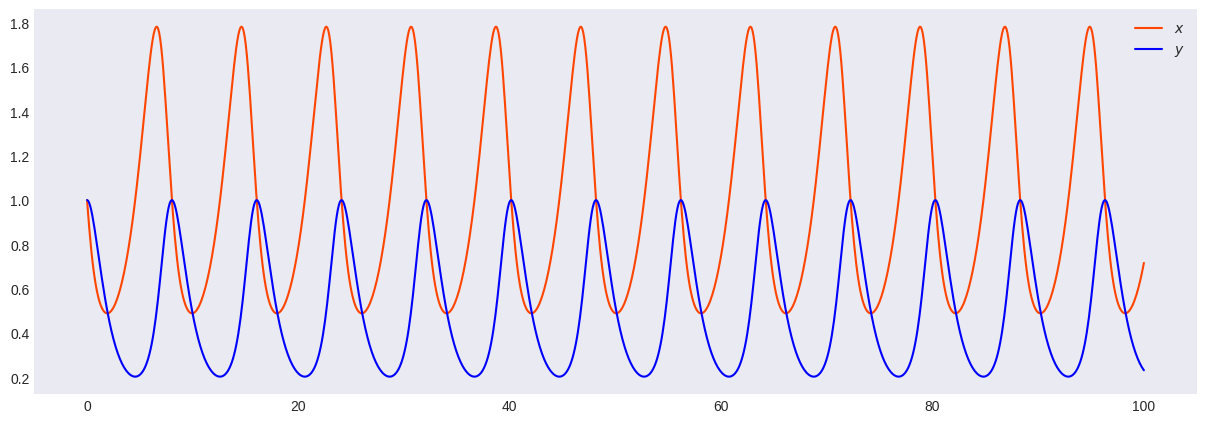

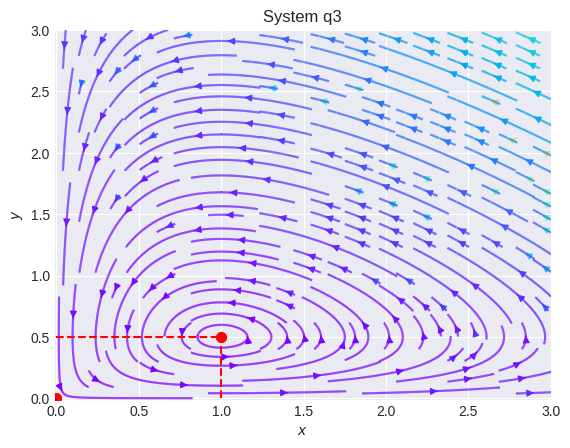

In [19]:
def q3(x, y, *, x_s, y_s, a, b, d, g):
    # J = np.array([[a - b*y_s, -b*x_s],
    #               [y_s*d, d*x_s - g]])

    # dx, dy = J @ np.array([x,y])

    dx = x*(a-b*y)
    dy = y*(d*x-g)
    
    return dx, dy

def q3_odeint(s, t, x_s, y_s, a, b, d, g):
    # J = np.array([[a - b*y_s, -b*x_s],
    #               [y_s*d, d*x_s - g]])
    # dx, dy = J @ np.array(s)

    # print(s, J, dx, dy)
    x, y = s
    dx = x*(a-b*y)
    dy = y*(d*x-g)
    return [dx, dy]

fig, axs = plt.subplots(1,1,figsize=(15,5))
t = np.linspace(0, 100, 1000)
# axs = axs.flatten()

# x0 = (10, 15, 5)
# y0 = (15, 10, 5)

# init_condit = (0, 0)

a = 2/3
b = 4/3
d = 1
g = 1

stable_x = (g/d,)
stable_y = (a/b,)

print('stable_x, stable_y')

desc = ['a', 'b', 'c']
init_condit = [1,1]

for index, stable_point in enumerate(zip(stable_x, stable_y)):
    x_s, y_s = stable_point
    
    print('stable', x_s, y_s)
    print('init_condit', init_condit)
    
    args = {'x_s':x_s, 'y_s':y_s, 'a':a, 'b':b, 'd':d, 'g':g}
    
    Q = phaseportrait.PhasePortrait2D(q3, [-0.01, 3], Title=f'System q3', dF_args=args, xlabel="$x$", ylabel="$y$")
    f = Q.plot()

    #marca pontos fixos
    f[1].scatter((0, stable_x[0]), (0, stable_y[0]), s=50, color='r', zorder = 3)

    f[1].plot((stable_x[0], stable_x[0]), (0, stable_y[0]), 'r--', zorder = 3)
    f[1].plot((0, stable_x[0]), (stable_y[0], stable_y[0]), 'r--', zorder = 3)
    
    sol = odeint(q3_odeint, init_condit, t, args=(x_s, y_s, a, b, d, g,))
    axs.plot(t, sol[:, 0], 'orangered', label='$x$')
    axs.plot(t, sol[:, 1], 'blue', label='$y$')
    axs.grid()
    axs.legend()
    axs.set_title(f'')